[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/cca-cce/osm-cca/blob/main/jnb/simm71/cv3_lecture.ipynb)

In [1]:
# https://drive.google.com/file/d/1qzRGYLpEfdC3Sukag_fszX_jT-Ylpb4W/view?usp=sharing
!rm -rf *.zip cv-* 2>/dev/null
!gdown https://drive.google.com/uc?id=1qzRGYLpEfdC3Sukag_fszX_jT-Ylpb4W
!unzip -q *.zip 2>/dev/null

Downloading...
From (original): https://drive.google.com/uc?id=1qzRGYLpEfdC3Sukag_fszX_jT-Ylpb4W
From (redirected): https://drive.google.com/uc?id=1qzRGYLpEfdC3Sukag_fszX_jT-Ylpb4W&confirm=t&uuid=b5844323-47c4-4499-a040-f64b36b65226
To: /content/drive-download-20250106T125430Z-001.zip
100% 114M/114M [00:00<00:00, 115MB/s]


   Time (s)      SSIM
0      0.04  0.840358
1      0.08  0.842307
2      0.12  0.830693
3      0.16  0.817630
4      0.20  0.812296


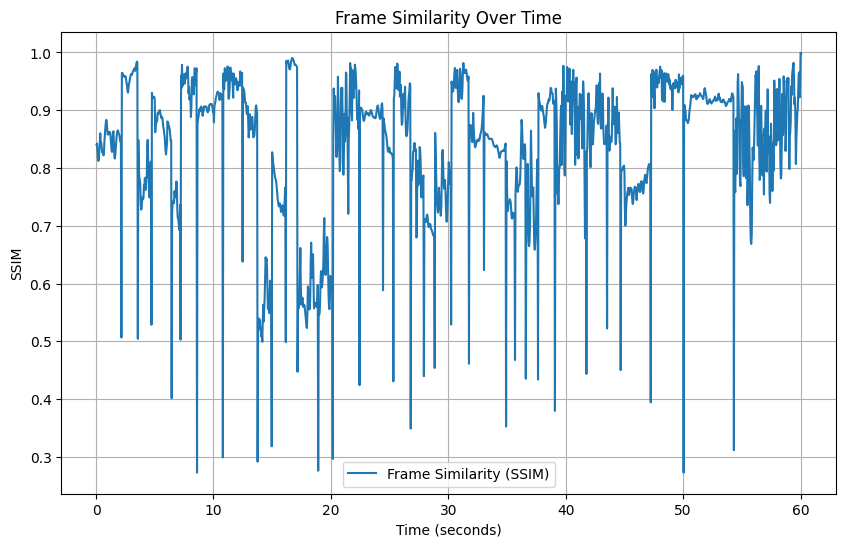

In [2]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as compare_ssim

# Path to the video
video_path = "/content/cv-org1-preem/oYgrxXZTAQg.webm"

# Open the video file
cap = cv2.VideoCapture(video_path)

# Get video frame rate to convert frame index to seconds
fps = cap.get(cv2.CAP_PROP_FPS)

# Initialize variables
frame_index = 0
previous_frame = None
similarity_scores = []

while True:
    ret, current_frame = cap.read()
    if not ret:
        break  # End of video

    # Convert frame to grayscale
    gray_frame = cv2.cvtColor(current_frame, cv2.COLOR_BGR2GRAY)

    if previous_frame is not None:
        # Compute SSIM between the previous and current frame
        ssim, _ = compare_ssim(previous_frame, gray_frame, full=True)

        # Convert frame index to time in seconds
        time_in_seconds = frame_index / fps

        # Record time and SSIM
        similarity_scores.append({"Time (s)": time_in_seconds, "SSIM": ssim})

    # Update the previous frame and frame index
    previous_frame = gray_frame
    frame_index += 1

# Release video capture
cap.release()

# Convert similarity scores to a pandas dataframe
df = pd.DataFrame(similarity_scores)

# Display the dataframe
print(df.head())

# Visualize SSIM changes as a line graph
plt.figure(figsize=(10, 6))
plt.plot(df["Time (s)"], df["SSIM"], label="Frame Similarity (SSIM)")
plt.xlabel("Time (seconds)")
plt.ylabel("SSIM")
plt.title("Frame Similarity Over Time")
plt.legend()
plt.grid()
plt.show()


   Time (s)      SSIM
0      0.04  0.888282
1      0.08  0.870232
2      0.12  0.845028
3      0.16  0.823856
4      0.20  0.818252


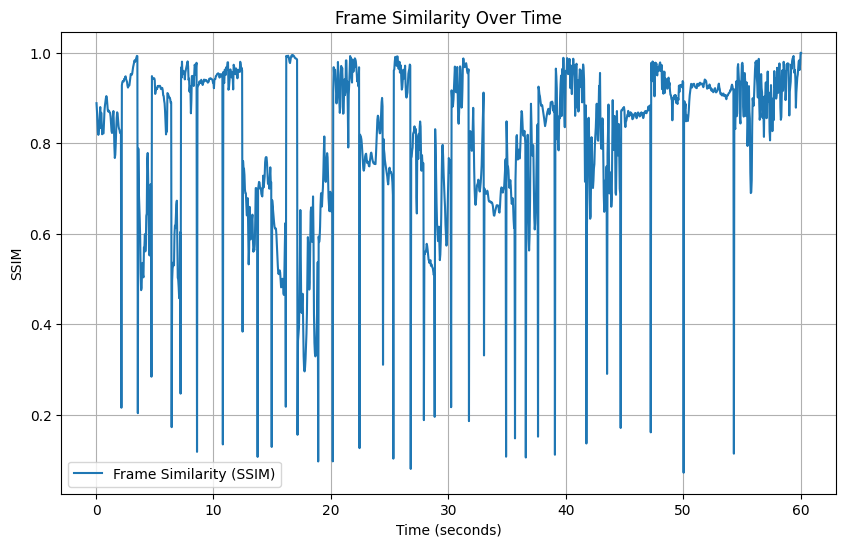

In [3]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.metrics import structural_similarity as compare_ssim

# Path to the video
video_path = "/content/cv-org1-preem/oYgrxXZTAQg.webm"

# Open the video file
cap = cv2.VideoCapture(video_path)

# Get video frame rate to convert frame index to seconds
fps = cap.get(cv2.CAP_PROP_FPS)

# Initialize variables
frame_index = 0
previous_frame = None
similarity_scores = []

while True:
    ret, current_frame = cap.read()
    if not ret:
        break  # End of video

    # Downsample frame to width 256 pixels while maintaining aspect ratio
    height, width = current_frame.shape[:2]
    aspect_ratio = height / width
    resized_frame = cv2.resize(current_frame, (256, int(256 * aspect_ratio)))

    # Convert frame to grayscale
    gray_frame = cv2.cvtColor(resized_frame, cv2.COLOR_BGR2GRAY)

    if previous_frame is not None:
        # Compute SSIM between the previous and current frame
        ssim, _ = compare_ssim(previous_frame, gray_frame, full=True)

        # Convert frame index to time in seconds
        time_in_seconds = frame_index / fps

        # Record time and SSIM
        similarity_scores.append({"Time (s)": time_in_seconds, "SSIM": ssim})

    # Update the previous frame and frame index
    previous_frame = gray_frame
    frame_index += 1

# Release video capture
cap.release()

# Convert similarity scores to a pandas dataframe
df = pd.DataFrame(similarity_scores)

# Display the dataframe
print(df.head())

# Visualize SSIM changes as a line graph using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="Time (s)", y="SSIM", label="Frame Similarity (SSIM)")
plt.xlabel("Time (seconds)")
plt.ylabel("SSIM")
plt.title("Frame Similarity Over Time")
plt.legend()
plt.grid()
plt.show()


   Time (s)      SSIM
0       0.4  0.249138
1       0.8  0.352642
2       1.2  0.277235
3       1.6  0.270998
4       2.0  0.234593


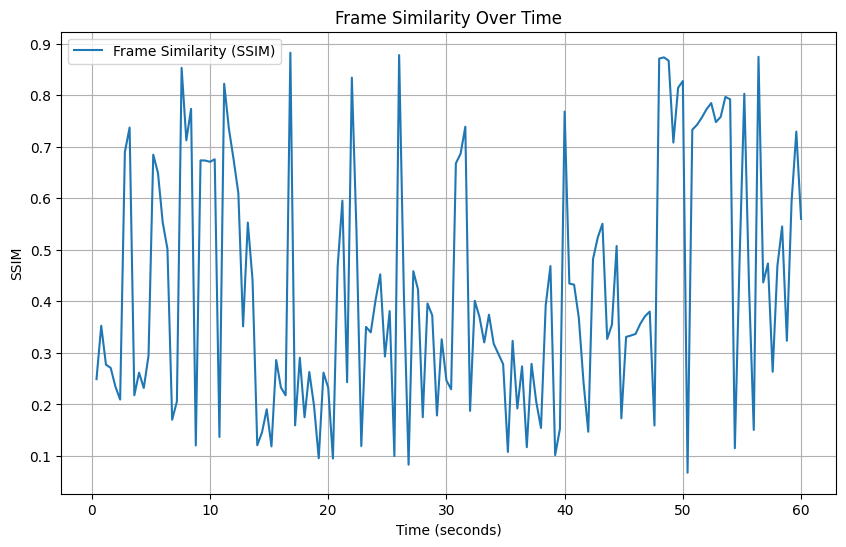

In [4]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.metrics import structural_similarity as compare_ssim

# Path to the video
video_path = "/content/cv-org1-preem/oYgrxXZTAQg.webm"

# Open the video file
cap = cv2.VideoCapture(video_path)

# Get video frame rate to convert frame index to seconds
fps = cap.get(cv2.CAP_PROP_FPS)

# Initialize variables
frame_index = 0
previous_frame = None
similarity_scores = []

while True:
    ret, current_frame = cap.read()
    if not ret:
        break  # End of video

    # Process every 10th frame
    if frame_index % 10 == 0:
        # Downsample frame to width 256 pixels while maintaining aspect ratio
        height, width = current_frame.shape[:2]
        aspect_ratio = height / width
        resized_frame = cv2.resize(current_frame, (256, int(256 * aspect_ratio)))

        # Convert frame to grayscale
        gray_frame = cv2.cvtColor(resized_frame, cv2.COLOR_BGR2GRAY)

        if previous_frame is not None:
            # Compute SSIM between the previous and current frame
            ssim, _ = compare_ssim(previous_frame, gray_frame, full=True)

            # Convert frame index to time in seconds
            time_in_seconds = frame_index / fps

            # Record time and SSIM
            similarity_scores.append({"Time (s)": time_in_seconds, "SSIM": ssim})

        # Update the previous frame
        previous_frame = gray_frame

    # Increment frame index
    frame_index += 1

# Release video capture
cap.release()

# Convert similarity scores to a pandas dataframe
df = pd.DataFrame(similarity_scores)

# Display the dataframe
print(df.head())

# Visualize SSIM changes as a line graph using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="Time (s)", y="SSIM", label="Frame Similarity (SSIM)")
plt.xlabel("Time (seconds)")
plt.ylabel("SSIM")
plt.title("Frame Similarity Over Time")
plt.legend()
plt.grid()
plt.show()


   Time (s)      SSIM  Smoothed SSIM
0      0.04  0.888282       0.888282
1      0.08  0.870232       0.879257
2      0.12  0.845028       0.867847
3      0.16  0.823856       0.856850
4      0.20  0.818252       0.849130


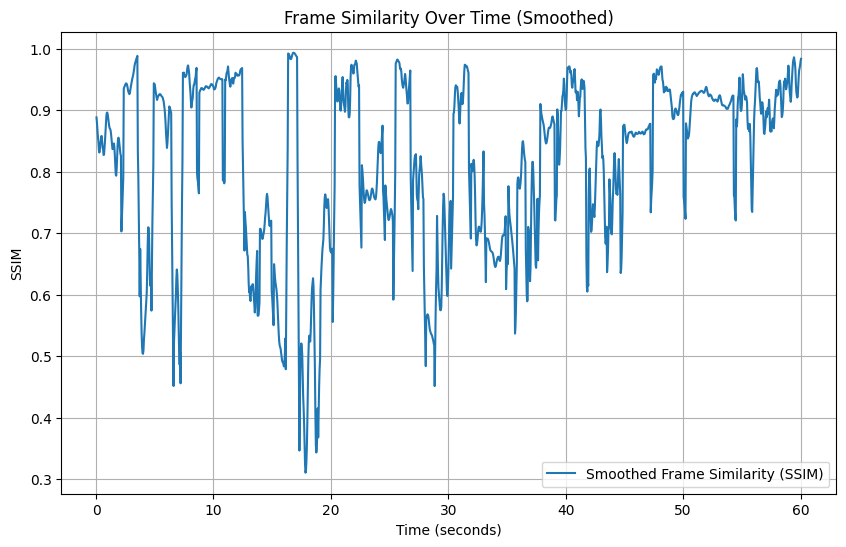

In [5]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.metrics import structural_similarity as compare_ssim

# Path to the video
video_path = "/content/cv-org1-preem/oYgrxXZTAQg.webm"

# Open the video file
cap = cv2.VideoCapture(video_path)

# Get video frame rate to convert frame index to seconds
fps = cap.get(cv2.CAP_PROP_FPS)

# Initialize variables
frame_index = 0
previous_frame = None
similarity_scores = []

while True:
    ret, current_frame = cap.read()
    if not ret:
        break  # End of video

    # Downsample frame to width 256 pixels while maintaining aspect ratio
    height, width = current_frame.shape[:2]
    aspect_ratio = height / width
    resized_frame = cv2.resize(current_frame, (256, int(256 * aspect_ratio)))

    # Convert frame to grayscale
    gray_frame = cv2.cvtColor(resized_frame, cv2.COLOR_BGR2GRAY)

    if previous_frame is not None:
        # Compute SSIM between the previous and current frame
        ssim, _ = compare_ssim(previous_frame, gray_frame, full=True)

        # Convert frame index to time in seconds
        time_in_seconds = frame_index / fps

        # Record time and SSIM
        similarity_scores.append({"Time (s)": time_in_seconds, "SSIM": ssim})

    # Update the previous frame and frame index
    previous_frame = gray_frame
    frame_index += 1

# Release video capture
cap.release()

# Convert similarity scores to a pandas dataframe
df = pd.DataFrame(similarity_scores)

# Apply moving average to smooth the SSIM values
df["Smoothed SSIM"] = df["SSIM"].rolling(window=5, min_periods=1).mean()

# Display the dataframe
print(df.head())

# Visualize SSIM changes as a line graph using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="Time (s)", y="Smoothed SSIM", label="Smoothed Frame Similarity (SSIM)")
plt.xlabel("Time (seconds)")
plt.ylabel("SSIM")
plt.title("Frame Similarity Over Time (Smoothed)")
plt.legend()
plt.grid()
plt.show()


In [7]:
# Filter the dataframe to view the 10 lowest SSIM values with corresponding time, ordered by time
lowest_ssim = df.nsmallest(10, "SSIM").sort_values(by="Time (s)")
print("10 Lowest SSIM Values (Ordered by Time):")
print(lowest_ssim)


10 Lowest SSIM Values (Ordered by Time):
      Time (s)      SSIM  Smoothed SSIM
343      13.76  0.106430       0.566106
472      18.92  0.096352       0.367665
503      20.16  0.096582       0.555507
632      25.32  0.102594       0.591763
669      26.80  0.079876       0.789802
872      34.92  0.106908       0.608852
914      36.60  0.105115       0.673412
976      39.08  0.111234       0.721872
1250     50.04  0.071484       0.759023
1357     54.32  0.113604       0.760951
